# Loss Functions

In this exercise, you will compare the effects of Loss functions on a `LinearRegression` model.

👇 Let's download a CSV file to use for this challenge and parse it into a DataFrame

In [4]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/loss_functions_dataset.csv")
data.sample(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
30,0.71,710.5,269.5,220.5,3.5,0.00,8.830
465,0.69,735.0,294.0,220.5,3.5,0.25,14.340
536,0.86,588.0,294.0,147.0,7.0,0.40,33.940
184,0.64,784.0,343.0,220.5,3.5,0.10,17.150
395,0.86,588.0,294.0,147.0,7.0,0.25,29.445


🎯 Your task is to predict the average temperature inside a greenhouse based on its design. Your temperature predictions will help you select the appropriate greenhouse design for each plant, based on their climate needs. 

🌿 You know that plants can handle small temperature variations, but are exponentially more sensitive as the temperature variations increase. 

## 1. Theory 

❓ Theoretically, which Loss function would you train your model on to limit the risk of killing plants?

<details>
<summary> 🆘 Answer </summary>
    
By theory, you would use a Mean Square Error (MSE) Loss function. It would penalize outlier predictions and prevent your model from committing large errors. This would ensure smaller temperature variations and a lower risk for plants.

</details>

Mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. The squaring means that larger mistakes result in more error than smaller mistakes, meaning that the model is punished for making larger mistakes

> YOUR ANSWER HERE

## 2. Application

### 2.1 Preprocessing

❓ Standardise the features

In [5]:
# scaling needed to normalise data within a particular range
# standard scaler removes the mean and scales each feature to unit variance
# can be influenced by outliers

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
X = data.loc[:, 'Relative Compactness': 'Glazing Area']

In [8]:
scaler = StandardScaler().fit(X)

In [9]:
X_scaled = scaler.transform(X)

In [10]:
X.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000


In [11]:
X_scaled

array([[ 2.04177671, -1.78587489, -0.56195149, -1.47007664,  1.        ,
        -1.76044698],
       [ 2.04177671, -1.78587489, -0.56195149, -1.47007664,  1.        ,
        -1.76044698],
       [ 2.04177671, -1.78587489, -0.56195149, -1.47007664,  1.        ,
        -1.76044698],
       ...,
       [-1.36381225,  1.55394308,  1.12390297,  0.97251224, -1.        ,
         1.2440492 ],
       [-1.36381225,  1.55394308,  1.12390297,  0.97251224, -1.        ,
         1.2440492 ],
       [-1.36381225,  1.55394308,  1.12390297,  0.97251224, -1.        ,
         1.2440492 ]])

In [18]:
import matplotlib.pyplot as plt

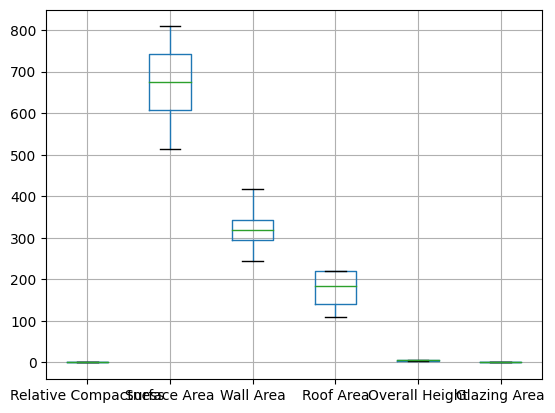

In [20]:
X.boxplot()
plt.show()

### 2.2 Modeling

In this section, you are going to verify the theory by evaluating models optimized on different Loss functions.

### Least Squares (MSE) Loss

❓ **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **Least Squares Loss** (MSE)



In [23]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDRegressor
import numpy as np

In [24]:
sgd_model = SGDRegressor(loss="squared_error")

In [25]:
sgd_model_cv = cross_validate(
    sgd_model,
    X_scaled,
    data['Average Temperature'],
    cv=10,
    scoring = ['r2', 'max_error']
)

In [19]:
# scoring defines the models evaluation rules
# If r2 = 0.9 The relationship between features and target explain 90% of the data

In [32]:
sgd_model_cv

{'fit_time': array([0.01183629, 0.00394917, 0.00486612, 0.0059731 , 0.00560999,
        0.00456905, 0.00461912, 0.00488877, 0.00435305, 0.00468493]),
 'score_time': array([0.00082684, 0.00075078, 0.00068307, 0.00065279, 0.00069094,
        0.00050473, 0.00066876, 0.00069618, 0.00056195, 0.00057817]),
 'test_r2': array([0.78634461, 0.90707203, 0.89445268, 0.8838496 , 0.93136045,
        0.89660489, 0.92734843, 0.91588374, 0.89491937, 0.93965754]),
 'test_max_error': array([-9.82017848, -8.81036173, -8.84664403, -9.13545307, -8.88004313,
        -8.64860524, -8.53826172, -8.79775694, -8.38895657, -7.67445969])}

❓ Compute 
- the mean cross-validated R2 score and save it in the variable `r2`
- the single biggest prediction error in °C of all your folds and save it in the variable `max_error`?

(Tips: `max_error` is an accepted scoring metric in sklearn)

In [33]:
r2 = sgd_model_cv['test_r2'].mean()
r2

0.8977493345404991

In [34]:
max_error = abs(sgd_model_cv['test_max_error']).max()
max_error

9.82017848067736

### Mean Absolute Error (MAE) Loss

What if we optimize our model on the MAE instead?

❓ **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **MAE** Loss

<details>
<summary>💡 Hints</summary>

- MAE loss cannot be directly specified in `SGDRegressor`. It must be engineered by adjusting the right parameters

</details>

In [21]:
# epsilon insensitive will ignore errors less than epsilson (have small errors)
# The larger e the larger error you admit in your solution

In [26]:
mae_model = SGDRegressor(loss="epsilon_insensitive", epsilon=0)

In [27]:
mae_model_cv = cross_validate(
    mae_model,
    X_scaled,
    data['Average Temperature'],
    cv=10,
    scoring = ['r2', 'max_error']
)

❓ Compute 
- the mean cross-validated R2 score, store it in `r2_mae`
- the single biggest prediction error of all your folds, store it in `max_error_mae`?

In [28]:
mae_model_cv

{'fit_time': array([0.00997519, 0.00729775, 0.0094099 , 0.00779796, 0.00763202,
        0.00693083, 0.00690579, 0.00709701, 0.00587392, 0.0068109 ]),
 'score_time': array([0.00078106, 0.00107002, 0.00076103, 0.00067925, 0.00051403,
        0.00056124, 0.00059319, 0.00043392, 0.00056124, 0.00044298]),
 'test_r2': array([0.74428177, 0.87242559, 0.87383104, 0.84779865, 0.91746631,
        0.87460344, 0.91808588, 0.89883562, 0.8783436 , 0.93548489]),
 'test_max_error': array([-10.99745923, -10.71955333, -10.68103849, -11.15810992,
        -11.13737606, -10.91464921, -10.77843166, -11.15380215,
        -10.95136123, -10.15295621])}

In [29]:
r2_mae = mae_model_cv['test_r2'].mean()

In [30]:
max_error_mae = abs(mae_model_cv['test_max_error']).max()
max_error_mae

11.158109917033578

## 3. Conclusion

❓Which of the models you evaluated seems the most appropriate for your task?

<details>
<summary> 🆘Answer </summary>
    
Although mean cross-validated r2 scores are approximately similar between the two models, the one optimized on a MAE has more chance to make larger mistakes from time to time, increasing the risk of killing plants!

    
</details>

> YOUR ANSWER HERE

# 🏁 Check your code and push your notebook

In [35]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'loss_functions',
    r2 = r2,
    r2_mae = r2_mae,
    max_error = max_error,
    max_error_mae = max_error_mae
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-loss-functions/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 3 items

test_loss_functions.py::TestLossFunctions::test_max_error_order PASSED   [ 33%]
test_loss_functions.py::TestLossFunctions::test_r2 PASSED                [ 66%]
test_loss_functions.py::TestLossFunctions::test_r2_mae PASSED            [100%]

============================== 3 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/loss_functions.pickle

git commit -m 'Completed loss_functions step'

git push origin master

